## Importando Utilitários

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

from morpho_package import * 

## Gerando imagem para exemplo

array([[4, 7, 5, 0, 3],
       [3, 3, 7, 1, 3],
       [5, 2, 4, 7, 6],
       [0, 0, 4, 2, 1],
       [6, 7, 7, 6, 0]])

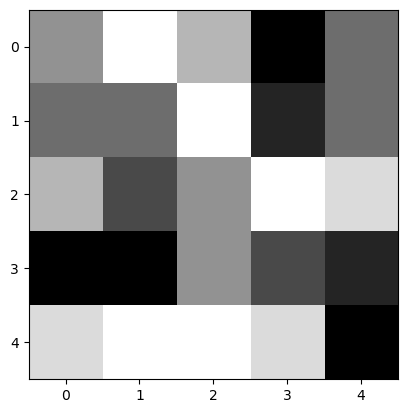

In [2]:
np.random.seed(0)
img = np.random.randint(0, 8, (5, 5))
plt.imshow(img, 'gray')
img

## Max-tree (Canonizando os pixels)

'Pixels Canônicos: [24, 19, 18, 4, 17, 10, 2, 14, 23, 7, 21]'

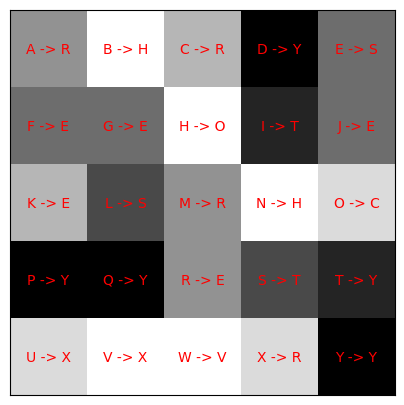

In [3]:
maxtree = MaxTree(img, Adjacency8())
maxtree.showParents()
f'Pixels Canônicos: {list(maxtree.nodes.keys())}'

In [4]:
maxtree.displayTree()

                                 Representant: 24        
                                 Level: 0                
                                 Parent: 24              
                                 CNPs: [24, 3, 16, 15]   
                                 Children Nodes: [19]    
                                 (Top, Left): (0, 0)     
                                 (Bottom, Right): (4, 4) 
                                 Area: 25                
                                 Volume: 93              
                                 Height: 5               
                                 Width: 5                
                                            |
                                 Representant: 19        
                                 Level: 1                
                                 Parent: 24              
                                 CNPs: [19, 8]           
                                 Children Nodes: [18]    
                          

## Podando a Max-Tree (Área $\leqslant$ 4)

In [5]:
# Limiar para a poda dos nós da árvore
criteria = lambda attributes: attributes.area <= 4

# Imagem podada
maxtree_pruned = Pruning(maxtree, criteria)

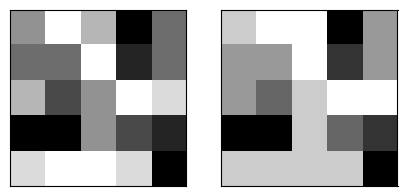

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 5))

ax1.imshow(maxtree.image, 'gray')
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

ax2.imshow(maxtree_pruned.pruned_image.reshape(maxtree.image.shape), 'gray')
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

## Min-Tree (Canonizando os pixels)

'Pixels Canônicos: [13, 20, 2, 12, 9, 6, 11, 18, 8, 19, 15, 3, 24]'

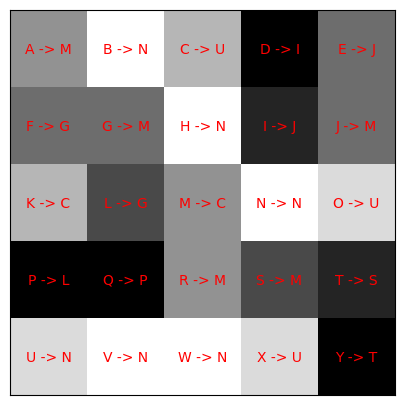

In [7]:
mintree = MinTree(img, Adjacency8())
mintree.showParents()
f'Pixels Canônicos: {list(mintree.nodes.keys())}'

In [8]:
mintree.displayTree()

                           Representant: 13         
                           Level: 7                 
                           Parent: 13               
                           CNPs: [13, 22, 21, 1, 7] 
                           Children Nodes: [20]     
                           (Top, Left): (0, 0)      
                           (Bottom, Right): (4, 4)  
                           Area: 25                 
                           Volume: 93               
                           Height: 5                
                           Width: 5                 
                                      |
                           Representant: 20        
                           Level: 6                
                           Parent: 13              
                           CNPs: [20, 23, 14]      
                           Children Nodes: [2]     
                           (Top, Left): (0, 0)     
                           (Bottom, Right): (4, 4) 
             

## Podando a Min-Tree (Volume $\leqslant$ 4)

In [9]:
# Limiar para a poda dos nós da árvore
criteria = lambda attributes: attributes.volume <= 4

# Imagem podada
mintree_pruned = Pruning(mintree, criteria)

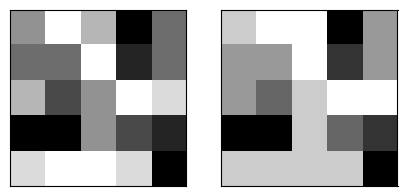

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 5))

ax1.imshow(maxtree.image, 'gray')
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

ax2.imshow(maxtree_pruned.pruned_image.reshape(maxtree.image.shape), 'gray')
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

## Exemplo

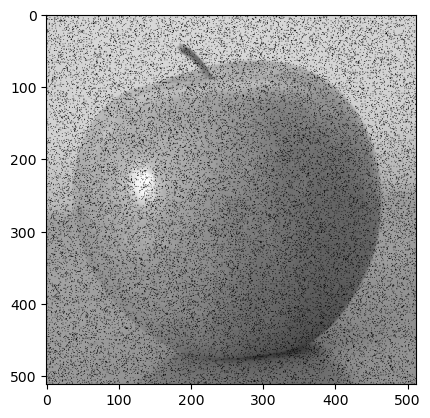

In [11]:
apple_image = cv.imread('./apple_with_noise.png', 0)
plt.imshow(apple_image, 'gray');

In [12]:
# Min-tree
apple_mintree = MinTree(apple_image, Adjacency8())

# Limiar para a poda os nós da árvore, baseado no atributo área
prunning_treshold = lambda attributes: attributes.area <= 15

# Realizando a poda
apple_pruned = Pruning(apple_mintree, prunning_treshold)

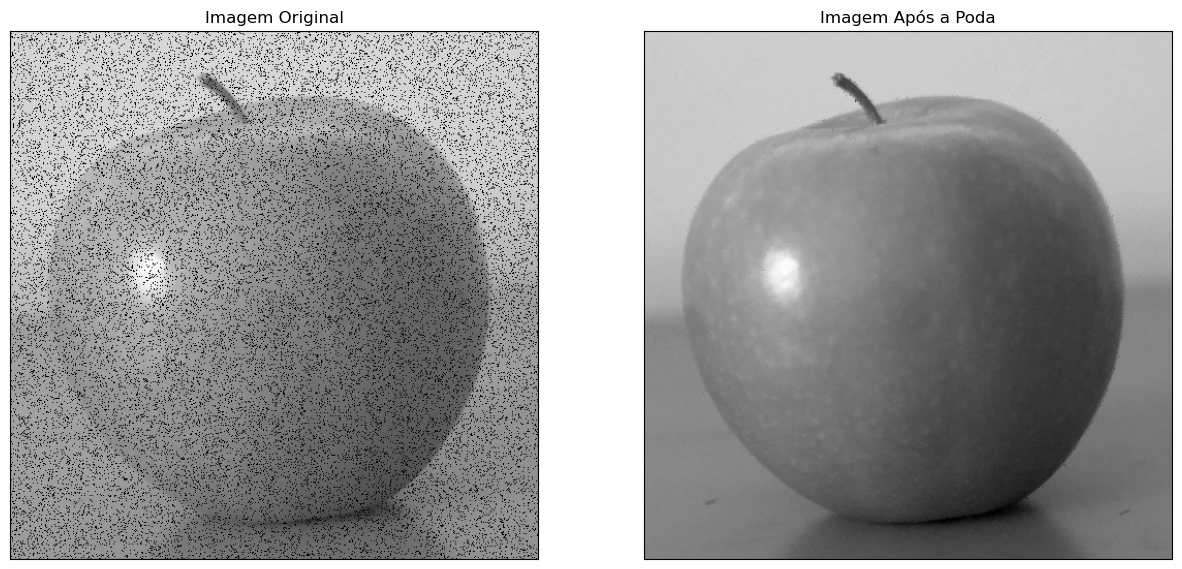

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))

ax1.imshow(apple_image, 'gray')
ax1.set_title('Imagem Original')
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

ax2.imshow(apple_pruned.pruned_image.reshape(apple_image.shape), 'gray')
ax2.set_title('Imagem Após a Poda')
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)